# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [23]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [26]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [29]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [32]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [34]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [36]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
df.shape

(1460, 80)

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

plt.xlabel('Value')### Sale Price

In the cell below, produce a histogram for `SalePrice`.

Parameters:
x: The input data (array-like).
bins: The number of bins or the bin edges.
range: The lower and upper range of the bins.
density: If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1.
weights: An array of weights, of the same shape as x.
cumulative: If True, then a histogram is computed where each bin gives the counts in that bin plus all bins for smaller values.
histtype: The type of histogram to draw ('bar', 'barstacked', 'step', 'stepfilled').
align: The alignment of the bars ('left', 'mid', 'right').
orientation: The orientation of the histogram ('horizontal' or 'vertical').
rwidth: The relative width of the bars as a fraction of the bin width.
log: If True, the histogram axis will be set to a log scale.
color: The color of the bars.
label: The label for the histogram.
stacked: If True, multiple data are stacked on top of each other.

Creating the Histogram:

plt.hist(data, bins=30, edgecolor='black'): Create the histogram with 30 bins and black edges for the bars.
Customizing the Plot:

plt.title('Histogram of Random Data'): Add a title to the plot.
plt.xlabel('Value'): Label the x-axis.
plt.ylabel('Frequency'): Label the y-axis.
Displaying the Plot:

plt.show(): Display the histogram

import matplotlib.pyplot as plt

plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False,
         bottom=None, histtype='bar', align='mid', orientation='vertical', 
         rwidth=None, log=False, color=None, label=None, stacked=False, 
         **kwargs)

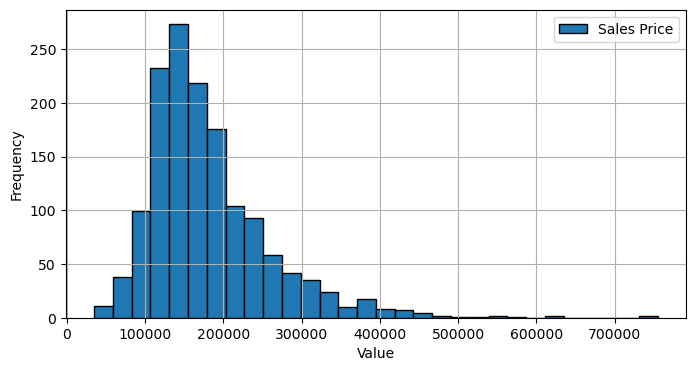

In [104]:
# Your code here
# This solution uses a function to avoid repeated code, but a 
# function is not 100% necessary. You could replace each of the
# parameters with a hard-coded value instead.
plt.figure(figsize=(8, 4))
plt.hist(df['SalePrice'], bins=30, histtype='bar', edgecolor='black')
plt.title = ('Histogram of Random Data')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.legend(['Sales Price'])
plt.grid(True)
plt.show()


Now, print out the mean, median, and standard deviation:

In [100]:
# Your code here
print(df['SalePrice'].mean(), 'is the mean of Sales Price')
print(df['SalePrice'].median(), 'is the median of Sales Price')
print(df['SalePrice'].std(),'is the standard deviation of Sales Price')

180921.19589041095 is the mean of Sales Price
163000.0 is the median of Sales Price
79442.50288288663 is the standard deviation of Sales Price


In the cell below, interpret the above information.

In [102]:
# Replace None with appropriate text
"""
The diffrence between the mean and median indicate most houses range around 163000 however there are
Outliers that push the mean price to 18021
"""

'\nThe diffrence between the mean and median indicate most houses range around 163000 however there are\nOutliers that push the mean price to 18021\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

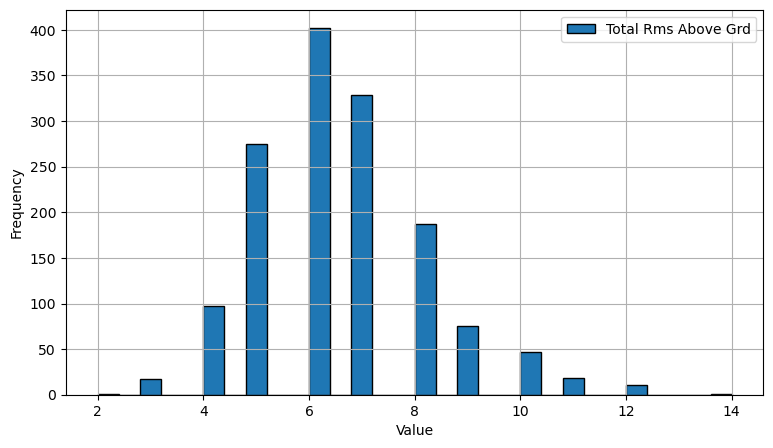

In [106]:
# Your code here
plt.figure(figsize=(9, 5))
plt.title = ('Histogram of Random Data')
plt.hist(df['TotRmsAbvGrd'], bins = 30, histtype = 'bar', edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.legend(['Total Rms Above Grd'])
plt.grid(True)
plt.show()

Now, print out the mean, median, and standard deviation:

In [110]:
# Your code here
print(df['TotRmsAbvGrd'].mean(), 'is the mean')
print(df['TotRmsAbvGrd'].median(), 'is the median')
print(df['TotRmsAbvGrd'].std(),'is the standard deviation')

6.517808219178082 is the mean
6.0 is the median
1.625393290584064 is the standard deviation


In the cell below, interpret the above information.

In [112]:
# Replace None with appropriate text
"""
The number if rooms in the houses represented are consistent to 6 per house except 
for a few that range between 8 and 14 pushing the mean up slightly at 6.5
"""

'\nThe number if rooms in the houses represented are consistent to 6 per house except \nfor a few that range between 8 and 14 pushing the mean up slightly at 6.5\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

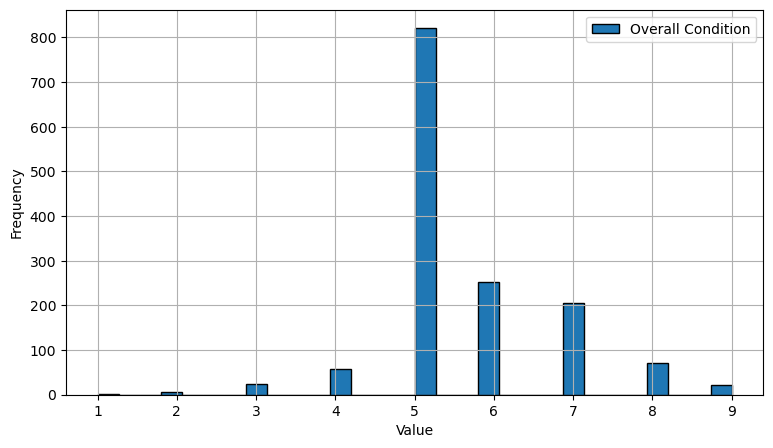

In [114]:
# Your code here
plt.figure(figsize=(9, 5))
plt.title = ('Histogram of Random Data')
plt.hist(df['OverallCond'], bins = 30, histtype = 'bar', edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.legend(['Overall Condition'])
plt.grid(True)
plt.show()

Now, print out the mean, median, and standard deviation:

In [116]:
# Your code here
print(df['OverallCond'].mean(), 'is the mean')
print(df['OverallCond'].median(), 'is the median')
print(df['OverallCond'].std(),'is the standard deviation')

5.575342465753424 is the mean
5.0 is the median
1.1127993367127367 is the standard deviation


In the cell below, interpret the above information.

In [118]:
# Replace None with appropriate text
"""
The standard condition of the homes is at 5 however the distribution is skewed with a significant number above 
that pushing the mean rating to 5.57
"""

'\nThe standard condition of the homes is at 5 however the distribution is skewed with a significant number above \nthat pushing the mean rating to 5.57\n'

OverallCond## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [120]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [125]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

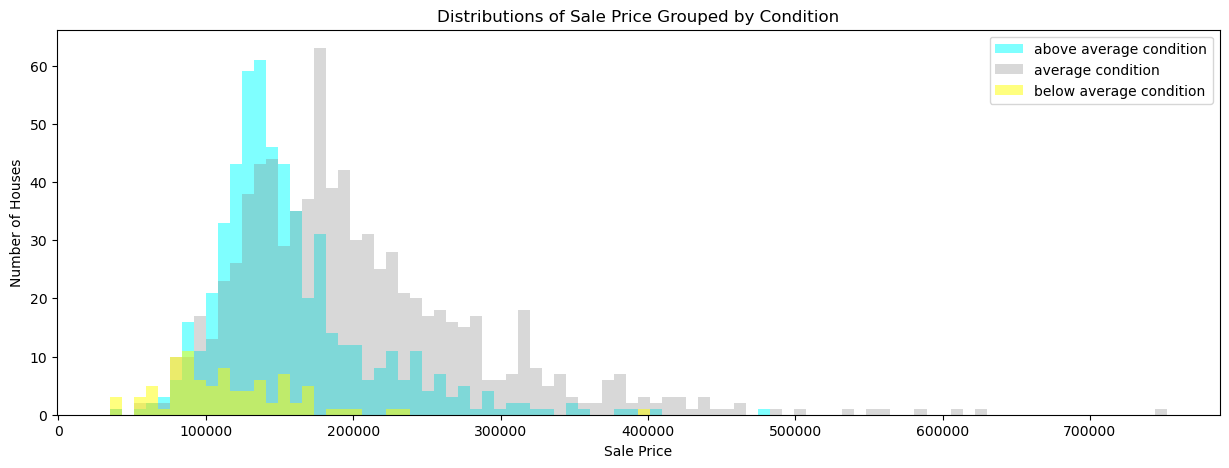

In [127]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text
"""
The histogram shows no correlation between the sales price and the condition due to the average condition attracting a higher sales price
as oppossed to the above average condition that attracts a lower or same price as a below average conditined house.
The above average condition houses sold almost the same number of houses but for 30% less the price.
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [137]:
# Your code here
# Get a list of correlations with SalePrice, sorted from smallest to largest since the most positive correlation is the largest
correlation_series = df.corr(numeric_only = True)['SalePrice'].sort_values()
# Select second to last correlation, since the highest (last) correlation will be SalePrice correlating 100% with itself
max_corr_value = correlation_series.iloc[-2]
max_corr_column = correlation_series.index[-2]
print("Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

# Note that there are very small differences in these numbers due to
# floating point rounding errors

Most Positively Correlated Column: OverallQual
Maximum Correlation Value: 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [139]:
# Your code here
min_corr_value = correlation_series.iloc[0]
min_corr_column = correlation_series.index[0]
print("Most Negatively Correlated Column:", min_corr_column)
print("Min Correlation Value:", min_corr_value)

Most Negatively Correlated Column: KitchenAbvGr
Min Correlation Value: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

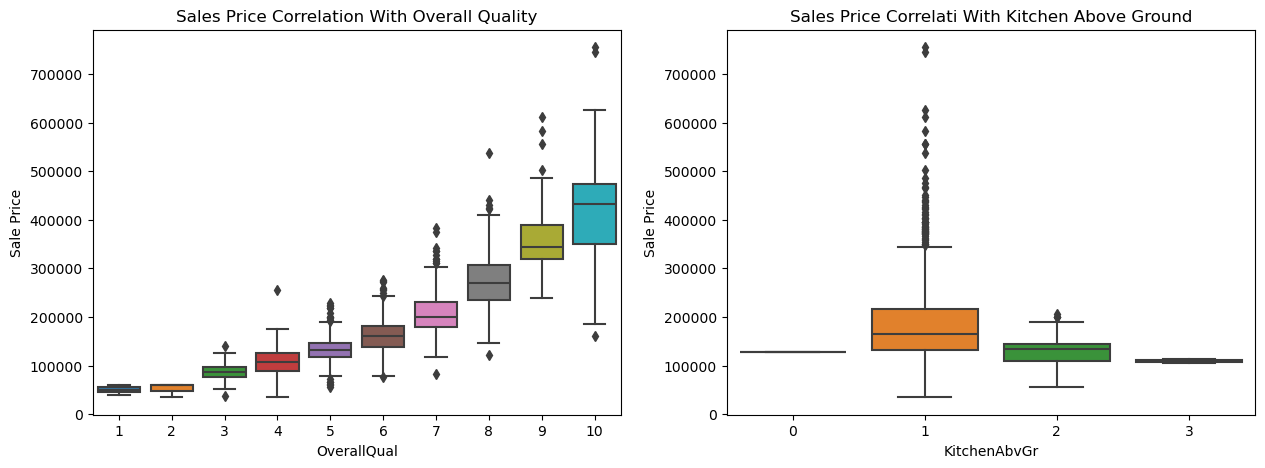

In [145]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[max_corr_column],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[min_corr_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Sales Price Correlation With Overall Quality')
ax1.set_xlabel('OverallQual')
ax1.set_ylabel("Sale Price")
ax2.set_title('Sales Price Correlati With Kitchen Above Ground')
ax2.set_xlabel('KitchenAbvGr')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [150]:
# Replace None with appropriate text
"""
From the box plots OverallQual has the most positive correlation with Sales Price and is decribed as:
Rates the overall material and finish of the house
This in description doesn does not differ much from Overall Condition : Rates the overall condition of the house.
The relationship seems exponential with increase in Overall Quality directly affecting the Sales Price.

The box plot also shows a negative correlation with  Kitchens Abpve Ground which would be counterintuitive considering
more kitchens could mean more options to catering, commercial food buisness or family size.
"""

'\nFrom the box plots OverallQual has the most positive correlation with Sales Price and is decribed as:\nRates the overall material and finish of the house\nThis in description doesn does not differ much from Overall Condition : Rates the overall condition of the house.\nThe relationship seems exponential with increase in Overall Quality directly affecting the Sales Price.\n\nThe box plot also shows a negative correlation with  Kitchens Abpve Ground which would be counterintuitive considering\nmore kitchens could mean more options to catering, commercial food buisness or family size.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [152]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()#counts how many values of each year there are and sorts them by index

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

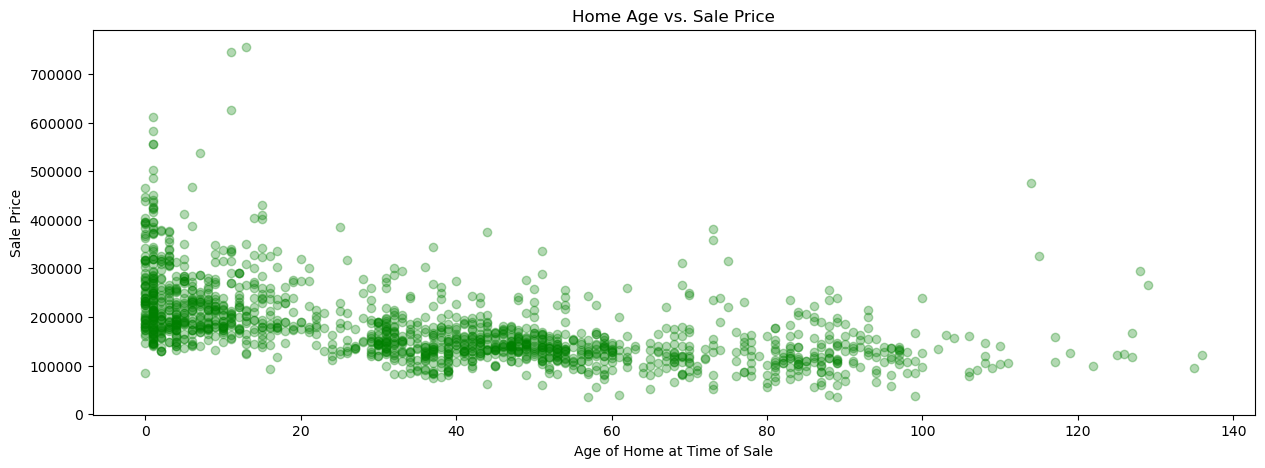

In [154]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [156]:
# Replace None with appropriate text
"""
Newer homes sell for more and faster than older homes as represented in the scatter plot
"""

'\nNewer homes sell for more and faster than older homes as represented in the scatter plot\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.